# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yusuf Bagus Sungging Herlambang
- **Email:** yusuf.herlambang27@gmail.com
- **ID Dicoding:** masbag

## Menentukan Pertanyaan Bisnis



1.   Bagaimana pola penggunaan sepeda berbagi berdasarkan musim dan kondisi cuaca?
2.   Apakah hari kerja atau hari libur lebih memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling
Pada bagian ini, data diproses untuk memastikan data bersih dan siap digunakan untuk analisis.


### Gathering Data

In [6]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
merged_data = hour_data.merge(day_data[['dteday', 'season', 'holiday', 'workingday', 'weathersit']],
                            on='dteday', how='left')
print("\nMerged Dataset Preview:")
print(merged_data.head())


Merged Dataset Preview:
   instant     dteday  season_x  yr  mnth  hr  holiday_x  weekday  \
0        1 2011-01-01         1   0     1   0          0        6   
1        2 2011-01-01         1   0     1   1          0        6   
2        3 2011-01-01         1   0     1   2          0        6   
3        4 2011-01-01         1   0     1   3          0        6   
4        5 2011-01-01         1   0     1   4          0        6   

   workingday_x  weathersit_x  ...   atemp   hum  windspeed  casual  \
0             0             1  ...  0.2879  0.81        0.0       3   
1             0             1  ...  0.2727  0.80        0.0       8   
2             0             1  ...  0.2727  0.80        0.0       5   
3             0             1  ...  0.2879  0.75        0.0       3   
4             0             1  ...  0.2879  0.75        0.0       0   

   registered  cnt  season_y  holiday_y  workingday_y  weathersit_y  
0          13   16         1          0             0          

**Insight:**
- Dataset yang digunakan: `day.csv` (data harian) dan `hour.csv` (data jam).
- Data dimuat ke dalam DataFrame menggunakan `pandas`.

### Assessing Data

In [7]:
    print("\nDay Data Info:")
    print(day_data.info())
    print("\nHour Data Info:")
    print(hour_data.info())
    print("\nMissing Values in Day Data:")
    print(day_data.isnull().sum())
    print("\nMissing Values in Hour Data:")
    print(hour_data.isnull().sum())
    print("\nDuplicate Rows in Day Data:", day_data.duplicated().sum())
    print("Duplicate Rows in Hour Data:", hour_data.duplicated().sum())
    print("\nSummary Statistics for 'cnt' (day.csv):")
    print(day_data['cnt'].describe())
    print("\nSummary Statistics for 'cnt' (hour.csv):")
    print(hour_data['cnt'].describe())



Day Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetim

**Insight:**
- Memeriksa tipe data, missing values, duplikasi, dan outliers.
- Statistik deskriptif untuk memahami distribusi data.

### Cleaning Data

In [8]:
    hour_data.ffill(inplace=True)


    # Removing duplicate rows
    day_data = day_data.drop_duplicates()
    hour_data = hour_data.drop_duplicates()

    # Handling outliers in 'cnt' using IQR
    Q1 = day_data['cnt'].quantile(0.25)
    Q3 = day_data['cnt'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    day_data = day_data[(day_data['cnt'] >= lower_bound) & (day_data['cnt'] <= upper_bound)]

    # Normalize numerical columns (optional)
    numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
    day_data[numerical_cols] = day_data[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    print(day_data)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

**Insight:**
- Mengatasi missing values dengan metode forward fill.
- Menghapus duplikasi baris.
- Menghilangkan outliers menggunakan metode Interquartile Range (IQR).
- Normalisasi data untuk kolom numerik.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
data = day_data
# Preview data for season and weather
print("Preview of Data for Season and Weather:")
print(data[['season', 'weathersit', 'cnt']].head())

# Statistik Deskriptif
season_weather_stats = data.groupby(['season', 'weathersit'])['cnt'].describe()
print("\nStatistics for Rentals by Season and Weather:")
print(season_weather_stats)

# Preview data for working day and holiday
print("\nPreview of Data for Working Day and Holiday:")
print(data[['workingday', 'holiday', 'cnt']].head())

# Statistik Deskriptif
working_holiday_stats = data.groupby(['workingday', 'holiday'])['cnt'].describe()
print("\nStatistics for Rentals by Working Day and Holiday:")
print(working_holiday_stats)

Preview of Data for Season and Weather:
   season  weathersit   cnt
0       1           2   985
1       1           2   801
2       1           1  1349
3       1           1  1562
4       1           1  1600

Statistics for Rentals by Season and Weather:
                   count         mean          std     min      25%     50%  \
season weathersit                                                             
1      1           111.0  2811.135135  1409.960622   431.0  1629.00  2417.0   
       2            66.0  2357.166667  1313.332082   605.0  1381.50  2020.5   
       3             4.0   934.750000   826.272100   441.0   489.75   564.5   
2      1           113.0  5548.548673  1467.655078  2028.0  4595.00  5585.0   
       2            68.0  4236.705882  1579.038070  1471.0  3211.50  4205.5   
       3             3.0  1169.000000   461.679543   795.0   911.00  1027.0   
3      1           136.0  5878.257353  1356.647125  3285.0  4688.50  5534.5   
       2            48.0  5222.479

**Insight:**
EDA bertujuan untuk memahami pola dan hubungan dalam data.

### Analisis
1. Distribusi jumlah penyewaan sepeda.
2. Pola penggunaan berdasarkan musim dan kondisi cuaca.
3. Perbandingan jumlah penyewaan pada hari kerja dan hari libur.

**Langkah:**
- Menggunakan histogram untuk distribusi penyewaan sepeda.
- Menggunakan boxplot untuk pola penggunaan berdasarkan musim dan cuaca.
- Menggunakan bar chart untuk membandingkan hari kerja dan hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

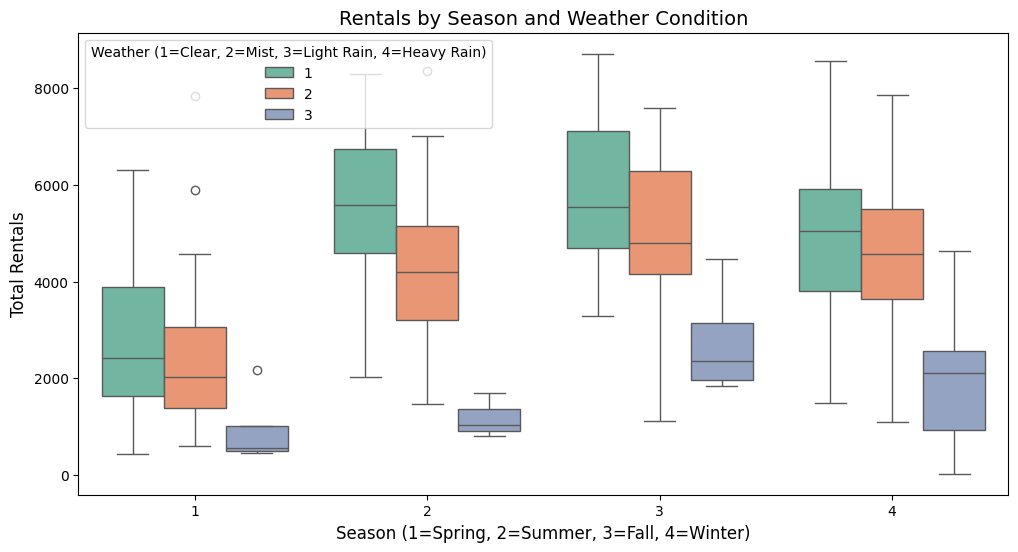

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='season', y='cnt', hue='weathersit', palette='Set2')
plt.title('Rentals by Season and Weather Condition', fontsize=14)
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.legend(title='Weather (1=Clear, 2=Mist, 3=Light Rain, 4=Heavy Rain)', fontsize=10)
plt.show()

### Pertanyaan 2:

<ipython-input-15-1ee4a260c1ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_avg, x='Type', y='cnt', palette='Blues_d')


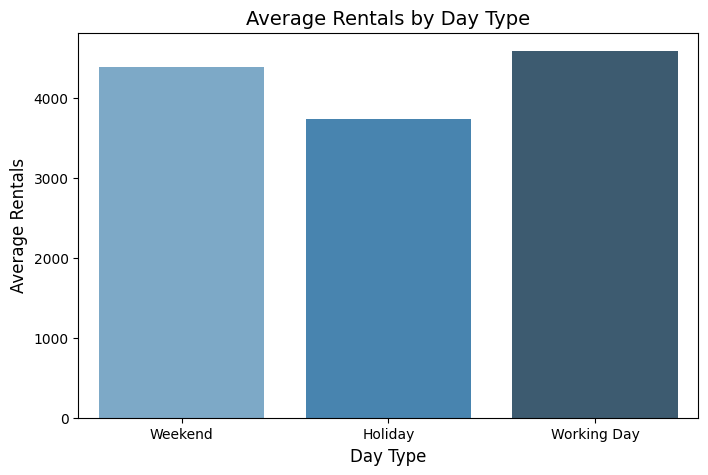

In [15]:
workingday_avg = data.groupby(['workingday', 'holiday'])['cnt'].mean().reset_index()
workingday_avg['Type'] = workingday_avg.apply(
    lambda row: 'Holiday' if row['holiday'] == 1 else 'Working Day' if row['workingday'] == 1 else 'Weekend', axis=1
)

plt.figure(figsize=(8, 5))
sns.barplot(data=workingday_avg, x='Type', y='cnt', palette='Blues_d')
plt.title('Average Rentals by Day Type', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.show()

**Insight:**
Visualisasi membantu menyampaikan hasil analisis secara efektif.

### Prinsip Visualisasi
1. **Minimalkan Clutter**: Hapus elemen yang tidak diperlukan (gridlines, legenda redundan).
2. **Fokus pada Informasi Utama**: Gunakan warna atau anotasi untuk menyoroti informasi penting.
3. **Interaktivitas**: Tambahkan filter atau kontrol untuk eksplorasi data.

### Visualisasi Utama
1. Distribusi Penyewaan Sepeda
   - Memahami distribusi data penyewaan.
2. Pola Berdasarkan Musim dan Cuaca
   - Menunjukkan pengaruh musim dan cuaca terhadap jumlah penyewaan.
3. Perbandingan Hari Kerja vs Hari Libur
   - Mengetahui apakah penyewaan lebih tinggi pada hari kerja atau hari libur.

## Analisis Lanjutan (Opsional)

Langkah-langkah:

1.   Recency: Menghitung jumlah hari sejak penyewaan terakhir untuk setiap kombinasi musim, cuaca, dan tipe hari.
2.   Frequency: Menghitung total penyewaan untuk setiap kombinasi.
3.   Monetary: Menghitung rata-rata penyewaan harian.

In [10]:
# Recency: Hari terakhir penyewaan berdasarkan musim dan kondisi cuaca
recency = data.groupby(['season', 'weathersit'])['dteday'].max().reset_index()
recency['Recency (Days Ago)'] = (data['dteday'].max() - recency['dteday']).dt.days
recency = recency[['season', 'weathersit', 'Recency (Days Ago)']]

# Frequency: Total penyewaan berdasarkan musim dan kondisi cuaca
frequency = data.groupby(['season', 'weathersit'])['cnt'].sum().reset_index()
frequency.rename(columns={'cnt': 'Frequency (Total Rentals)'}, inplace=True)

# Monetary: Rata-rata penyewaan harian
monetary = data.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()
monetary.rename(columns={'cnt': 'Monetary (Avg Daily Rentals)'}, inplace=True)

# Gabungkan hasil RFM
rfm = recency.merge(frequency, on=['season', 'weathersit'])
rfm = rfm.merge(monetary, on=['season', 'weathersit'])

# Tambahkan label untuk musim dan cuaca
rfm['Season'] = rfm['season'].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
rfm['Weather'] = rfm['weathersit'].map({1: "Clear", 2: "Mist", 3: "Light Rain", 4: "Heavy Rain"})

print("RFM Analysis Results:")
print(rfm)

RFM Analysis Results:
    season  weathersit  Recency (Days Ago)  Frequency (Total Rentals)  \
0        1           1                   1                     312036   
1        1           2                   0                     155573   
2        1           3                   5                       3739   
3        2           1                 194                     626986   
4        2           2                 196                     288096   
5        2           3                 253                       3507   
6        3           1                 100                     799443   
7        3           2                 104                     250679   
8        3           3                 163                      11007   
9        4           1                  12                     519487   
10       4           2                  11                     302510   
11       4           3                  63                      19616   

    Monetary (Avg Daily Rent

### Visualisasi Recency:

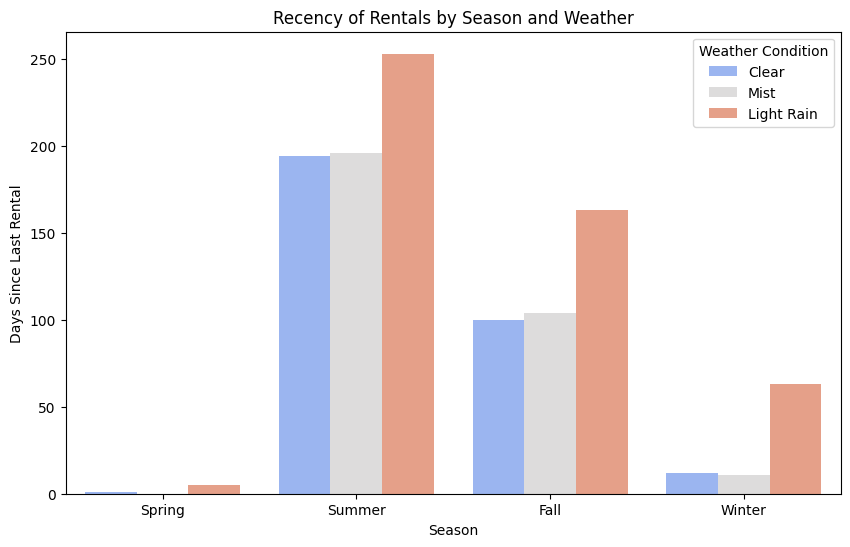

In [11]:
# Recency Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Season', y='Recency (Days Ago)', hue='Weather', palette='coolwarm')
plt.title('Recency of Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Days Since Last Rental')
plt.legend(title='Weather Condition')
plt.show()

### Visualisasi Frequency:

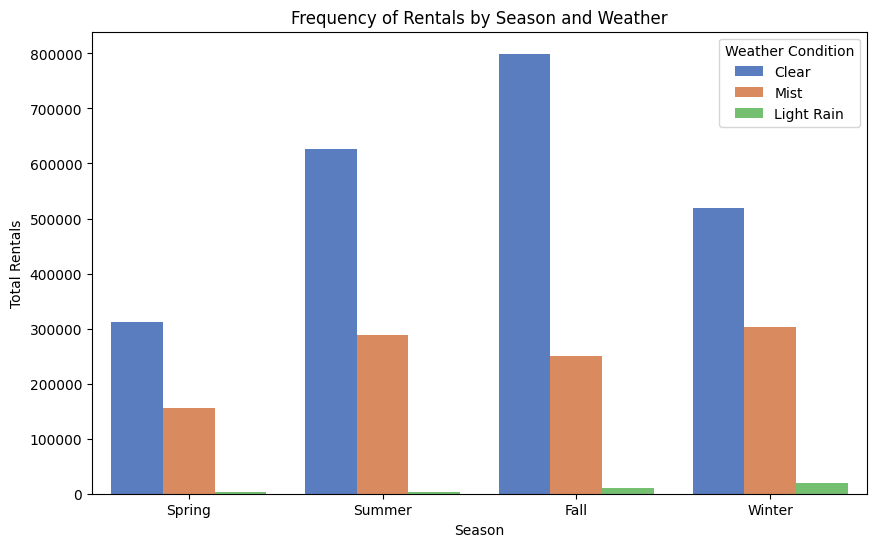

In [12]:
# Frequency Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Season', y='Frequency (Total Rentals)', hue='Weather', palette='muted')
plt.title('Frequency of Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Condition')
plt.show()

### Visualisasi Monetary:

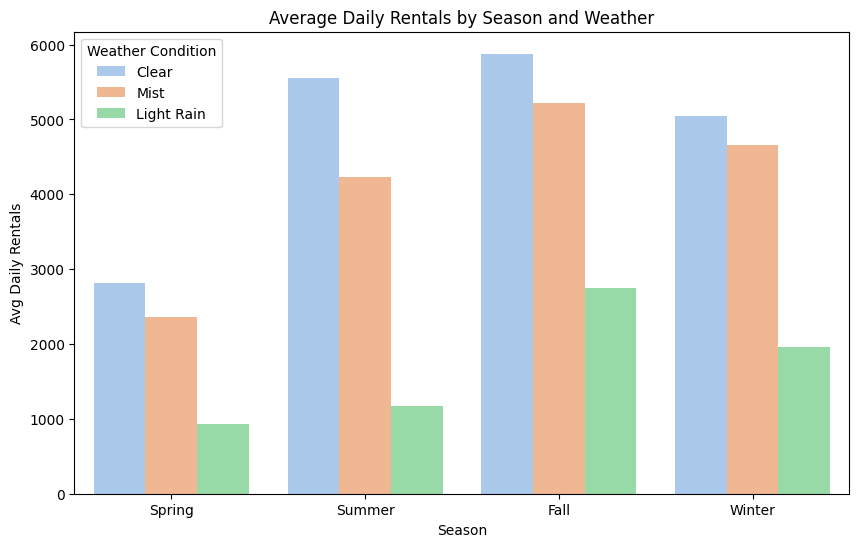

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Season', y='Monetary (Avg Daily Rentals)', hue='Weather', palette='pastel')
plt.title('Average Daily Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Avg Daily Rentals')
plt.legend(title='Weather Condition')
plt.show()

## Conclusion



Kesimpulan :
1.   Pola Penggunaan Berdasarkan Musim dan Kondisi Cuaca:
      - Penyewaan tertinggi terjadi pada musim panas dengan cuaca cerah.
      - Kondisi cuaca buruk seperti hujan ringan atau salju menurunkan jumlah penyewaan.

2.  Penyewaan lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan penggunaannya lebih banyak untuk keperluan kerja.

Berdasarkan RFM Analysis : Pola Penggunaan Berdasarkan Musim dan Kondisi Cuaca:
*   Recency: Penyewaan terakhir lebih sering terjadi pada musim panas (summer) dengan cuaca cerah.
*   Frequency: Total penyewaan tertinggi terjadi pada musim panas dengan cuaca cerah.
*   Monetary: Rata-rata penyewaan harian juga lebih tinggi pada musim panas dengan cuaca cerah.
